In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os, sys
currentdir = os.path.dirname(os.path.realpath('__file__'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)
from datasets.lorenz import Lorenz63

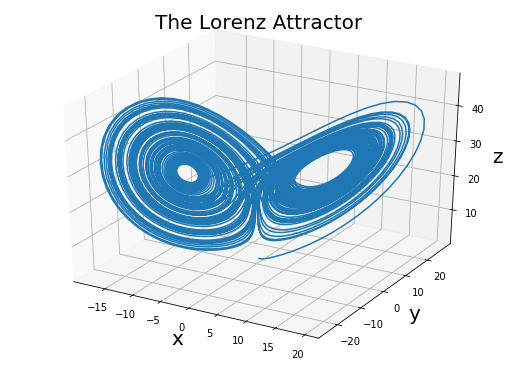

In [2]:
# Generate and plot Lorenz 63 model
tmax, num_samples = 100, 10000
X0 = np.array([0, 1, 1.05])

L63 = Lorenz63(tmax, X0, num_samples)
L63.plot()

In [3]:
def which_wing(X: np.array, lag: int) -> np.array:
    """ Returns array of 0s and 1s corresponding to whether a point lands on the
        left or right wing respectively after time=lag
        Args:
            X: array of shape (3, timesteps)
        
        Output: array of shape (timesteps - lag, )
    """
    x, y, z = X
    return (x[lag:] > 0).astype(int)

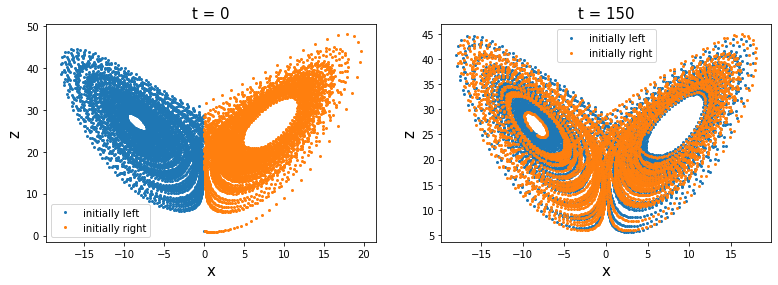

In [62]:
tsteps = 150
X = L63.trajectory
N = L63.num_samples
initial_labels = which_wing(X,lag=0)[:N-tsteps]

left_indices = np.argwhere(initial_labels == 0)
right_indices = np.argwhere(initial_labels == 1)

leftX_before = np.array([X[:,i] for i in left_indices]).squeeze()
rightX_before = np.array([X[:,i] for i in right_indices]).squeeze()

leftX_after = np.array([X[:,i + tsteps] for i in left_indices]).squeeze()
rightX_after = np.array([X[:,i + tsteps] for i in right_indices]).squeeze()

leftX = np.stack([leftX_before, leftX_after])
rightX = np.stack([rightX_before, rightX_after])

fig = plt.figure(figsize=(13, 4))
timestamps = [0, tsteps]
for i in range(2):
    ax = plt.subplot(1, 2, i+1)
    plt.plot(leftX[i][:,0].squeeze(), leftX[i][:,2].squeeze(), 'o', color='tab:blue', ms=2, label='initially left')
    plt.plot(rightX[i][:,0].squeeze(), rightX[i][:,2].squeeze(), 'o', color='tab:orange', ms=2, label='initially right')
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('z', fontsize=15)
    ax.set_title(f't = {timestamps[i]}', fontsize=15)
    ax.legend()

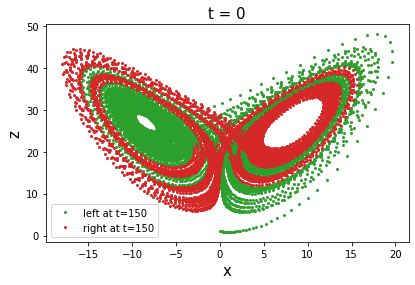

In [63]:
lag = tsteps
lagged_labels = which_wing(X,lag=lag)[:N-tsteps]

left_indices = np.argwhere(lagged_labels == 0)
right_indices = np.argwhere(lagged_labels == 1)

eventually_leftX = np.array([X[:,i] for i in left_indices]).squeeze()
eventually_rightX = np.array([X[:,i] for i in right_indices]).squeeze()

fig = plt.figure(figsize=(6.5, 4))
ax = plt.gca()
plt.plot(eventually_leftX[:,0].squeeze(), eventually_leftX[:,2].squeeze(), 'o', color='tab:green', ms=2, label=f'left at t={tsteps}')
plt.plot(eventually_rightX[:,0].squeeze(), eventually_rightX[:,2].squeeze(), 'o', color='tab:red', ms=2, label=f'right at t={tsteps}')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('z', fontsize=15)
ax.set_title(f't = 0', fontsize=15)
ax.legend()